In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:

folders = [
    'normal_runs',
    'closer_clock_rates',
    'lower_internal_prob'
]
jump_data = dict()
for folder in folders:
    runs = []
    for i in range(1, 6):
        avg_jumps = []
        for p in ['a', 'b', 'c']:
            df = pd.read_csv(f'{folder}/machine_log_{p}_{i}.txt', sep = '|')
            arr = df.loc[:, ' Clock'].to_numpy()
            # avg across a particular trial and process
            avg_jumps.append(np.mean(arr[1:] - arr[:-1]))
        # avg across a particular trials
        runs.append(np.mean(avg_jumps))
    jump_data[folder] = runs

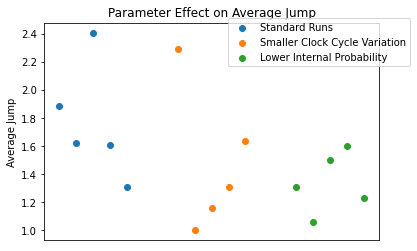

In [61]:
labels = [
    "Standard Runs",
    "Smaller Clock Cycle Variation",
    "Lower Internal Probability"
]
fig, ax = plt.subplots()
for i, folder in enumerate(folders):
    y = np.array(jump_data[folder])
    ax.scatter((np.arange(5) - 2) + i * 7, y, label = labels[i])
    ax.legend(loc = [0.55, 0.8])
    ax.set_xticks([])
    ax.set_ylabel('Average Jump')
    ax.set_title('Parameter Effect on Average Jump')

In [78]:
queue_data = dict()
for folder in folders:
    runs = []
    for i in range(1, 6):
        avg_queue_lengths = []
        for p in ['a', 'b', 'c']:
            df = pd.read_csv(f'{folder}/machine_log_{p}_{i}.txt', sep = '|')
            # grab actual numerical values
            arr = df.loc[:, ' Q '][df.loc[:, ' Q '] != ' - '].to_numpy().astype('int')
            # avg across a particular trial and process
            avg_queue_lengths.append(np.mean(arr))
        # avg across a particular trials
        runs.append(np.mean(avg_queue_lengths))
    queue_data[folder] = runs

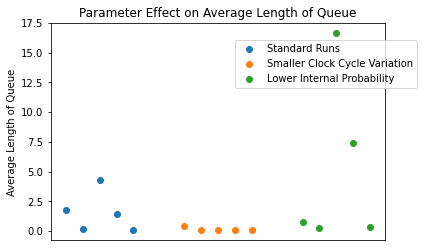

In [80]:
fig, ax = plt.subplots()
for i, folder in enumerate(folders):
    y = np.array(queue_data[folder])
    ax.scatter((np.arange(5) - 2) + i * 7, y, label = labels[i])
    ax.legend(loc = [0.55, 0.7])
    ax.set_xticks([])
    ax.set_ylabel('Average Length of Queue')
    ax.set_title('Parameter Effect on Average Length of Queue')